635.867083472989
2107.6206058024745
1468.6063055755658
639.0143002269087


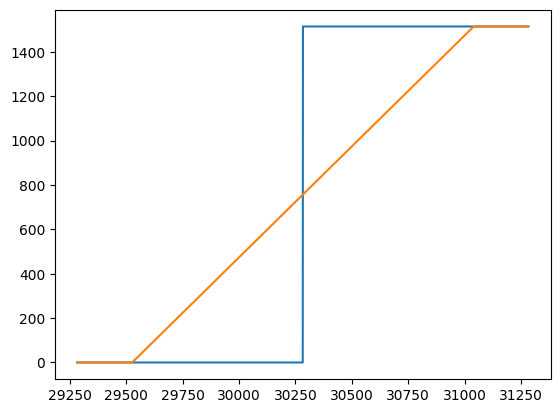

In [22]:
#Library
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#Input
ClosePrice=30283.61
Digital_Coupon_Percentage=5
Digital_Amount=Digital_Coupon_Percentage/100*ClosePrice
ATM_Strike=ClosePrice
ATM_sigma=16.481/100
r=3.541/100
q=4.866/100
b=r-q
T=367/365
#Digital Option PayOff
Sarray=np.arange(ATM_Strike-1000, ATM_Strike+1000,1)
Payoff_array=np.zeros(len(Sarray))
Payoff_array=(Sarray>=ATM_Strike)*Digital_Amount
plt.plot(Sarray,Payoff_array)
#Digital Option Price
d=(np.log(ClosePrice/ATM_Strike)+(b-ATM_sigma**2/2)*T)/(ATM_sigma*np.sqrt(T))
DigiCall=Digital_Amount*np.exp(-r*T)*norm.cdf(d)
print(DigiCall)
#Call spread approximation
#Long call
ITM_Strike=(100-Digital_Coupon_Percentage/2)/100*ClosePrice
ITM_sigma=17.11/100
d1=(np.log(ClosePrice/ITM_Strike)+(b-ITM_sigma**2/2)*T)/(ITM_sigma*np.sqrt(T))
d2=d1-ITM_sigma*np.sqrt(T)
LongCall=ClosePrice*np.exp((b-r)*T)*norm.cdf(d1)-ITM_Strike*np.exp(-r*T)*norm.cdf(d2)
print(LongCall)
#Short call
OTM_Strike=(100+Digital_Coupon_Percentage/2)/100*ClosePrice
OTM_sigma=15.93/100
d1=(np.log(ClosePrice/OTM_Strike)+(b-OTM_sigma**2/2)*T)/(OTM_sigma*np.sqrt(T))
d2=d1-ITM_sigma*np.sqrt(T)
ShortCall=ClosePrice*np.exp((b-r)*T)*norm.cdf(d1)-OTM_Strike*np.exp(-r*T)*norm.cdf(d2)
print(ShortCall)
#DigiApprox
DigiApprox=LongCall-ShortCall
print(DigiApprox)
#Call spread PayOff
Call_Spread_Payoff=np.zeros(len(Sarray))
Call_Spread_Payoff= (Sarray>=ITM_Strike) *(Sarray-ITM_Strike) + (Sarray>=OTM_Strike) *(-(Sarray-OTM_Strike))
plt.plot(Sarray,Call_Spread_Payoff)
